# Dataset Link https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "Train"
class_sayisi = len(os.listdir(train_path))
print(f"Sınıf sayısı: {class_sayisi}")

Sınıf sayısı: 43


In [3]:
images = []
classNo = []

for i in range(class_sayisi):
    image = os.listdir(train_path + "\\" + str(i))
    for j in image:
        img = cv2.imread(train_path + "\\" + str(i) + "\\" + j)
        img = cv2.resize(img, (32, 32))
        img = img / 255.0
        images.append(img)
        classNo.append(i)

In [4]:
images = np.array(images)
classNo = np.array(classNo)

print(f"Görüntüler: {images.shape}")
print(f"Sınıflar: {classNo.shape}")

Görüntüler: (39209, 32, 32, 3)
Sınıflar: (39209,)


In [5]:
categorical_class = class_sayisi
classNo = to_categorical(classNo, categorical_class)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(images, classNo, test_size=0.2, random_state=42)
print(f"Eğitim verisi {X_train.shape} Doğrulama verisi şekli{X_val.shape}")

Eğitim verisi (31367, 32, 32, 3) Doğrulama verisi şekli(7842, 32, 32, 3)


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(categorical_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

model.save("cnn_model.h5")

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3162 - loss: 2.5299 - val_accuracy: 0.8673 - val_loss: 0.5121
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7666 - loss: 0.7332 - val_accuracy: 0.9459 - val_loss: 0.2211
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8544 - loss: 0.4513 - val_accuracy: 0.9665 - val_loss: 0.1341
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8932 - loss: 0.3325 - val_accuracy: 0.9781 - val_loss: 0.0957
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9153 - loss: 0.2670 - val_accuracy: 0.9813 - val_loss: 0.0834
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9274 - loss: 0.2290 - val_accuracy: 0.9834 - val_loss: 0.0723
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9365 - loss: 0.1946 - val_accuracy: 0.9862 - val_loss: 0.0568
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9444 - loss: 0.1663 - 

In [8]:
test = pd.read_csv("Test.csv")

test_images = []
test_labels = test['ClassId'].values
test_paths = test['Path'].values

In [9]:
for img_path in test_paths:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    test_images.append(img)

In [10]:
test_images = np.array(test_images) / 255.0

test_labels_onehot = to_categorical(test_labels, categorical_class)
test_loss, test_accuracy = model.evaluate(test_images, test_labels_onehot)
print(f"Test doğruluğu: {test_accuracy * 100}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9592 - loss: 0.1800
Test doğruluğu: 95.66904306411743


In [11]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


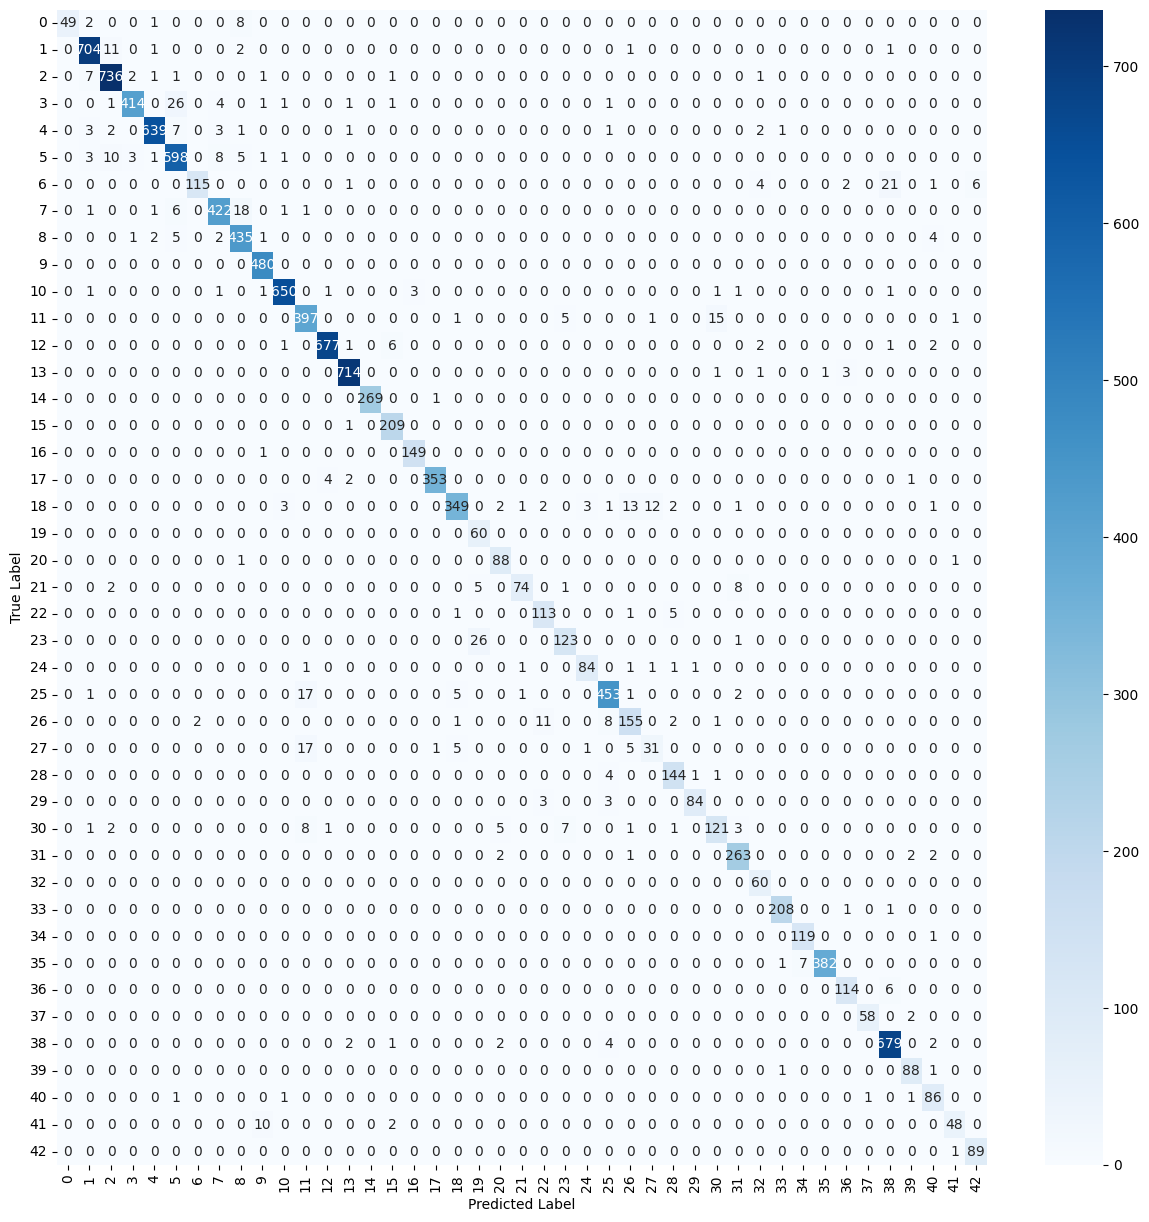

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(categorical_class), yticklabels=np.arange(categorical_class))
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    probability = np.max(predictions)

    return predicted_class, probability

image_path = "C:\\Users\\Gokhan\\Desktop\\Diginova\\Meta\\19.png"
label, prob = predict_image(image_path)
print(f"Tahmin edilen sınıf: {label}, Olasılık: {prob:}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Tahmin edilen sınıf: 19, Olasılık: 0.9960248470306396
